In [1]:
import cv2
import numpy as np
from ipywidgets import interact
%matplotlib inline
from matplotlib import pyplot as plt

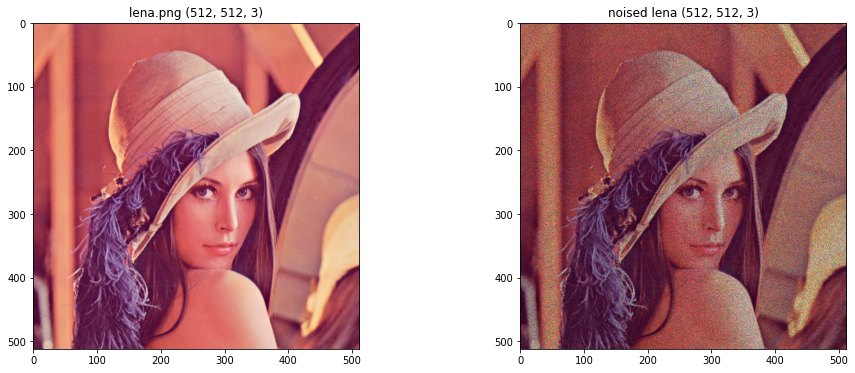

In [2]:
img = cv2.imread('./lena.png', cv2.IMREAD_COLOR)
noisy_img = img.astype(float) + np.random.uniform(img.astype(float))
noisy_img = np.uint8(255. * np.abs(noisy_img) / np.max(np.abs(noisy_img)))

plt.figure(1, figsize = (16, 6))
plt.subplot(121)
plt.title('lena.png %s' % str(img.shape))
plt.imshow(img[...,::-1])
plt.subplot(122)
plt.title('noised lena %s' % str(noisy_img.shape))
plt.imshow(noisy_img[...,::-1]);

In [3]:
def median_filter(img, ksize):
    temp = []
    indexer = ksize // 2
    result = np.zeros_like(img)
    for channel in range(img.shape[-1]):
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                for size in range(ksize):
                    if row+size-indexer < 0 or row+size-indexer > img.shape[0]-1:
                        for k in range(ksize):
                            temp.append(0)
                    else:
                        if col+size-indexer < 0 or col+indexer > img.shape[1]-1:
                            temp.append(0)
                        else:
                            for k in range(ksize):
                                temp.append(img[row+size-indexer][col+k-indexer][channel])
                temp.sort()
                result[row][col][channel] = np.median(temp)
                temp = []
    return result

In [4]:
def median_filter_show(ksize=5):
    denoise_img = median_filter(noisy_img, ksize)
    plt.title(denoise_img.shape)
    return plt.imshow(denoise_img[...,::-1])

interact(median_filter_show, ksize = (1, 20, 1))

interactive(children=(IntSlider(value=5, description='ksize', max=20, min=1), Output()), _dom_classes=('widget…

<function __main__.median_filter_show(ksize=5)>